# 제조 데이터의 분류기 실습

## 실습 목표
----
- sklearn의 model을 사용하여 Classifier를 학습한다.
- 생성한 Classifier의 성능 개선을 위한 방법을 이해한다.
- Classifier에서 사용가능한 주요 성능 지표를 이해한다.

## 문제 정의
----

binary classifier

In [ ]:
# 라이브러리 & 데이터 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('exercise1.csv')

In [ ]:
df.head()

,a1,a2,a3,a4,a5,a6,target
0,24,0.29,700,0.013,100,1.4,0
1,44,0.47,400,0.012,20,0.6,0
2,13,0.21,1000,0.045,40,1.7,0
3,8,0.25,400,0.008,60,0.8,0
4,38,0.15,700,0.044,40,1.2,0


In [ ]:
df.shape

(1000, 7)

In [ ]:
df['target'].unique()

array([0, 1])

In [ ]:
df['target'].value_counts()

0    588
1    412
Name: target, dtype: int64

## 데이터 탐색

----

In [ ]:
# 데이터 탐색
df.describe()

,a1,a2,a3,a4,a5,a6,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,28.821000,0.283240,821.300000,0.027491,117.180000,1.712600,0.412000
std,10.502631,0.103347,254.560624,0.010786,45.428089,0.707079,0.492441
min,5.000000,0.050000,300.000000,0.005000,20.000000,0.200000,0.000000
25%,25.000000,0.240000,700.000000,0.021000,90.000000,1.300000,0.000000
50%,29.000000,0.290000,900.000000,0.027000,120.000000,1.800000,0.000000
75%,35.000000,0.340000,1000.000000,0.034000,150.000000,2.300000,1.000000
max,50.000000,0.500000,1200.000000,0.050000,200.000000,2.900000,1.000000


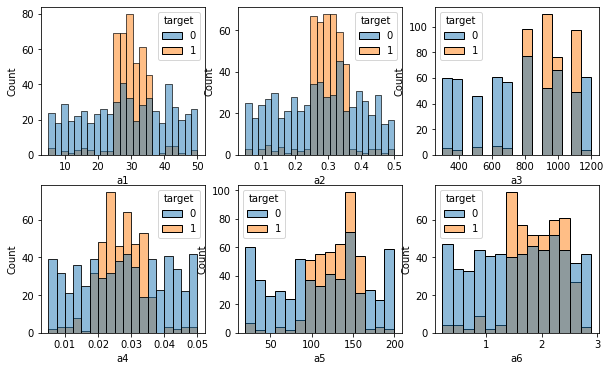

In [ ]:
# 데이터 시각화
nrows, ncols = 2, 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(10,6)

for i in range(nrows):
    for j in range(ncols):
        attr = i * ncols + j
        sns.histplot(x=df.columns[attr], data=df, hue = 'target', ax=axs[i][j])

## 주요 코드 미리 보기
----
1. 데이터 분할 : trainset. testset
    - train_test_split
2. 모델 인스턴스 생성
    - DecisionTreeClassifier
3. 모델 학습
    - .fit(X, y)
    - X(독립변수, feature)를 y(종속변수, target)에 맞춘다
4. 모델 평가
    - classifier : accuracy
    - accuracy_score()

In [ ]:
df.head()

,a1,a2,a3,a4,a5,a6,target
0,24,0.29,700,0.013,100,1.4,0
1,44,0.47,400,0.012,20,0.6,0
2,13,0.21,1000,0.045,40,1.7,0
3,8,0.25,400,0.008,60,0.8,0
4,38,0.15,700,0.044,40,1.2,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. 데이터 분할 
X = df.iloc[:, :6]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# 2. 모델 인스턴스 생성
model = DecisionTreeClassifier(random_state=42)

# 3. 모델 학습
model.fit(X_train, y_train)

# 4. 모델 평가
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8

## 코드 구현하기
----
   

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 2. 모델 인스턴스 생성
rf_cls = RandomForestClassifier(random_state=42)
gb_cls = GradientBoostingClassifier(random_state=42)
xgb_cls = XGBClassifier(random_state=42)
lgb_cls = LGBMClassifier(random_state=42)

# 3. 모델 학습
rf_cls.fit(X_train, y_train)
gb_cls.fit(X_train, y_train)
xgb_cls.fit(X_train, y_train)
lgb_cls.fit(X_train, y_train)

# 4. 모델 평가
y_pred_rf = rf_cls.predict(X_test)
y_pred_gb = gb_cls.predict(X_test)
y_pred_xgb = xgb_cls.predict(X_test)
y_pred_lgb = lgb_cls.predict(X_test)

print('RandomForest accuracy:{}'.format(accuracy_score(y_test, y_pred_rf)))
print('GB accuracy:{}'.format(accuracy_score(y_test, y_pred_gb)))
print('XGB accuracy:{}'.format(accuracy_score(y_test, y_pred_xgb)))
print('LGB accuracy:{}'.format(accuracy_score(y_test, y_pred_lgb)))

RandomForest accuracy:0.91
GB accuracy:0.915
XGB accuracy:0.915
LGB accuracy:0.91


# Quiz
다음과 같이 SVC를 사용하여 모델을 생성하고, 학습을 시켰을 때 모델의 정확도를 구하시오. 모델의 성능을 높이기 위해서 할 수 있는 방법은?

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.72

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scale = sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 42, stratify = y)


In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.92